In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/prod_views_data_viewfield_operations_fert.xlsx")
print(df.shape)


df.head()

(248, 30)


,farm_id,farm_season_id,farm_season_field_id,farm_season_field_name,farm_season_field_crop_id,crop_id,crop_name,fertiliser_id,fertiliser_name,fertiliser_id_cft,...,compk,compca,compmg,comps,compcaco3,inhibitor_used,is_custom_organic,machinery,passage,fertilisation_type
0,1555,1208,16516,SB,16020,73,Grain corn,229,0-25-25 6S,44.0,...,25.0,0,0,6,0,False,False,Fertiliser spreader,4,mineral_solid
1,1555,1208,16516,SB,16020,73,Grain corn,63,Zinc (elemental)*,NaN,...,0.0,0,0,0,0,False,False,Fertiliser spreader,4,mineral_solid
2,1555,1208,16516,SB,16020,73,Grain corn,61,Urea - 46% N,45.0,...,0.0,0,0,0,0,False,False,Fertiliser spreader,4,mineral_solid
3,1555,1208,16518,POMP,16022,49,Durum winter wheat,235,Ferti Leader Vital 9-5-4,44.0,...,4.0,0,0,0,0,False,False,Fertiliser spreader,5,mineral_solid
4,1555,1208,16518,POMP,16022,49,Durum winter wheat,229,0-25-25 6S,44.0,...,25.0,0,0,6,0,False,False,Fertiliser spreader,5,mineral_solid


In [4]:
df['farm_season_field_id'].nunique()

86

## drop missing values

In [5]:
#df= df.drop_duplicates(subset='farm_season_field_id', keep='last')
df = df.drop_duplicates()

In [6]:
df.columns

Index(['farm_id', 'farm_season_id', 'farm_season_field_id',
       'farm_season_field_name', 'farm_season_field_crop_id', 'crop_id',
       'crop_name', 'fertiliser_id', 'fertiliser_name', 'fertiliser_id_cft',
       'fertiliser_name_cft', 'fertiliser_name_dndc', 'fertiliser_type',
       'quantity', 'unit', 'volumic_mass', 'quantity_kg', 'N_perha', 'compn',
       'compp', 'compk', 'compca', 'compmg', 'comps', 'compcaco3',
       'inhibitor_used', 'is_custom_organic', 'machinery', 'passage',
       'fertilisation_type'],
      dtype='object')

In [7]:
df['crop_name'].unique()

array(['Grain corn', 'Durum winter wheat', 'Sunflower',
       'Winter barley 6 rows', 'Horse bean', 'Winter rapeseed',
       'Spring barley 2 rows'], dtype=object)

In [9]:
df = df[df['quantity_kg'] == df['quantity']]

1

## convert all to KG

In [12]:
df['volumic_mass'].nunique()

1

## Look for ouliers

In [14]:
print(df['quantity'].mean())
print(df['quantity'].median())

330.7
153.0


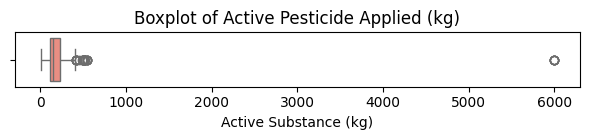

In [15]:
# Plot the distribution of converted active kg
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df['quantity'].dropna(), color='salmon')
plt.title("Boxplot of Active Pesticide Applied (kg)")
plt.xlabel("Active Substance (kg)")
plt.tight_layout()
plt.show()

In [23]:
# Compute bounds
q = df['quantity'].dropna()
lower = q.quantile(0.02)
upper = q.quantile(0.95)

# Count how many are below or above the bounds
outliers = q[(q < lower) | (q > upper)]

print(outliers)

5     539.0
52    539.0
57    539.0
63    539.0
65    539.0
93    522.0
Name: quantity, dtype: float64


In [24]:
df= df[(df['quantity'] >= lower) & (df['quantity'] <= upper)]

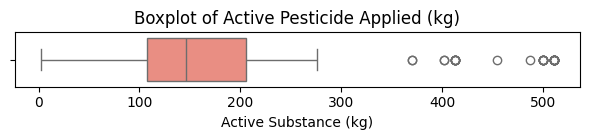

In [25]:

plt.figure(figsize=(6, 1.5))
sns.boxplot(x=df['quantity'].dropna(), color='salmon')
plt.title("Boxplot of Active Pesticide Applied (kg)")
plt.xlabel("Active Substance (kg)")
plt.tight_layout()
plt.show()

## Inspect per season and field

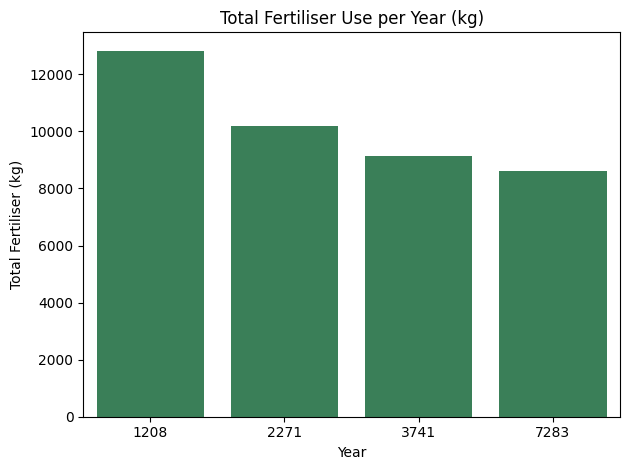

In [27]:
yearly_fert = df.groupby("farm_season_id")["quantity"].agg(["sum", "mean", "count"]).reset_index()
yearly_fert.columns = ["year", "total_kg", "avg_kg_per_app", "n_applications"]


sns.barplot(data=yearly_fert, x="year", y="total_kg", color='seagreen')
plt.title("Total Fertiliser Use per Year (kg)")
plt.xlabel("Year")
plt.ylabel("Total Fertiliser (kg)")
plt.tight_layout()
plt.show()


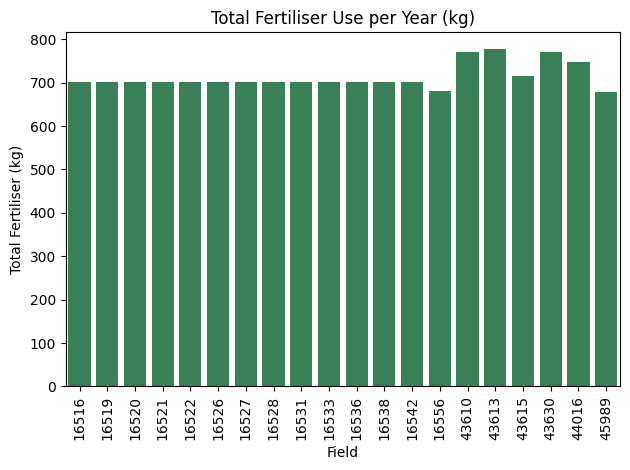

In [28]:
yearly_fert = df.groupby("farm_season_field_id")["quantity"].agg(["sum", "mean", "count"]).reset_index()
data = yearly_fert.sort_values("sum", ascending=False).head(20)

sns.barplot(data=data, x="farm_season_field_id", y="sum", color='seagreen')
plt.title("Total Fertiliser Use per Year (kg)")
plt.xlabel("Field")
plt.xticks(rotation=90)
plt.ylabel("Total Fertiliser (kg)")
plt.tight_layout()
plt.show()

In [29]:
field_fert = df.groupby("farm_season_field_id")["quantity"].sum()
field_fert.rename('fert_in_kg', inplace = True)
field_fert

,fert_in_kg
farm_season_field_id,
16516,700.9
16518,230.0
16519,700.9
16520,700.9
16521,700.9
...,...
360941,88.0
360943,494.0
360944,494.0


## Save

In [30]:
field_fert.to_csv("eda_fert.csv")